# Conversión Análogo a Digital (ADC)

Objetivos:


1.   Conocer, entender e implementar el proceso ADC
2.   Comprender, manipular y analizar diferentes cambios que ocurren en las señales durante el proceso de ADC cuando se modifican ciertos parámetros, e.g., frecuencia de muestreo, número de bits de cuantización, etc.



# Funciones

In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

def sample_and_hold(t_org, signal, fs_ori, fs_dest):
  t_dest = 1/fs_dest
  i = 0
  signal_resample = np.zeros(len(signal))
  samples = []
  t_sample= []
  while i* t_dest < max(t_org):
    idx_sample = np.where((t_org >= i *t_dest) & (t_org < i + 1 * t_dest))[0]
    signal_resample[idx_sample[0]: idx_sample[-1] +1 ] = signal[idx_sample[0]]
    samples.append(signal[idx_sample[0]])
    t_sample.append(i *t_dest)
    i += 1
  return signal_resample, t_sample, samples


def fxquant (s , bit ) :
  # s : señal de entrada normalizada entre -1 y 1
  # bit : bits de cuantizacion
  Plus1 = np.power(2,(bit-1))
  X = s*Plus1
  X = np.round(X)
  X = np.minimum(Plus1-1.0, X)
  X = np.maximum(-1.0*Plus1,X)
  X = X/Plus1
  return X

def plot_spectrogram(data, fs):
  '''
  Parameter:
  data: señal a la que se le calcula el espectrograma
  fs: frecuencia de muestreo de la señal
  '''
  # Resolución del espectrograma
  num =  1024
  hop = num//8

  stft = np.abs(librosa.stft(data,  n_fft=num, hop_length=hop  ))
  D = librosa.amplitude_to_db(stft, ref = np.max)
  spec = librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='linear', cmap=None, hop_length=hop)

## Señal senoidal

(1)   Cree una señal senoidal con una $f_{max} = 10 kHz$. Construya una figura que muestre 3 periodos de la señal.

(2)   Use la función 'sample_and_hold' (provista en esta guía) para realizar el muestreo de la señal usando las diferentes frecuencias que se presentan a continuación: $\frac{f_{max}}{4}, \frac{f_{max}}{2}, f_{max}, 2f_{max}$.

(3)  Use la función 'fxquant' (provista en esta guía) para realizar el proceso de cuantización. Luego cambie la cantidad de bits de cuantización usando: $2, 3, 4, 5, \text{y } 6 $ bits


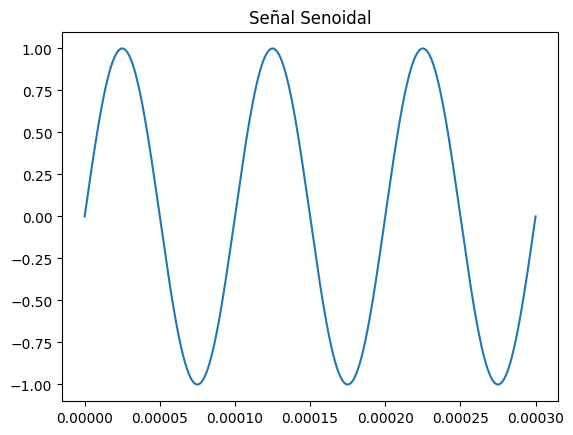

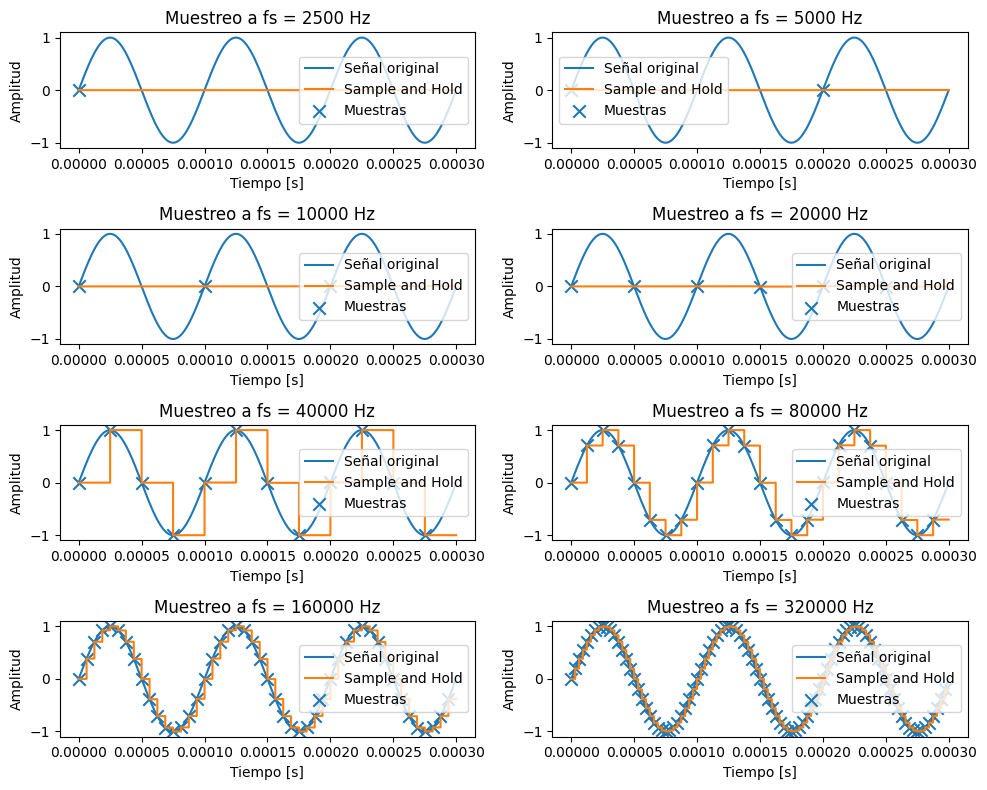

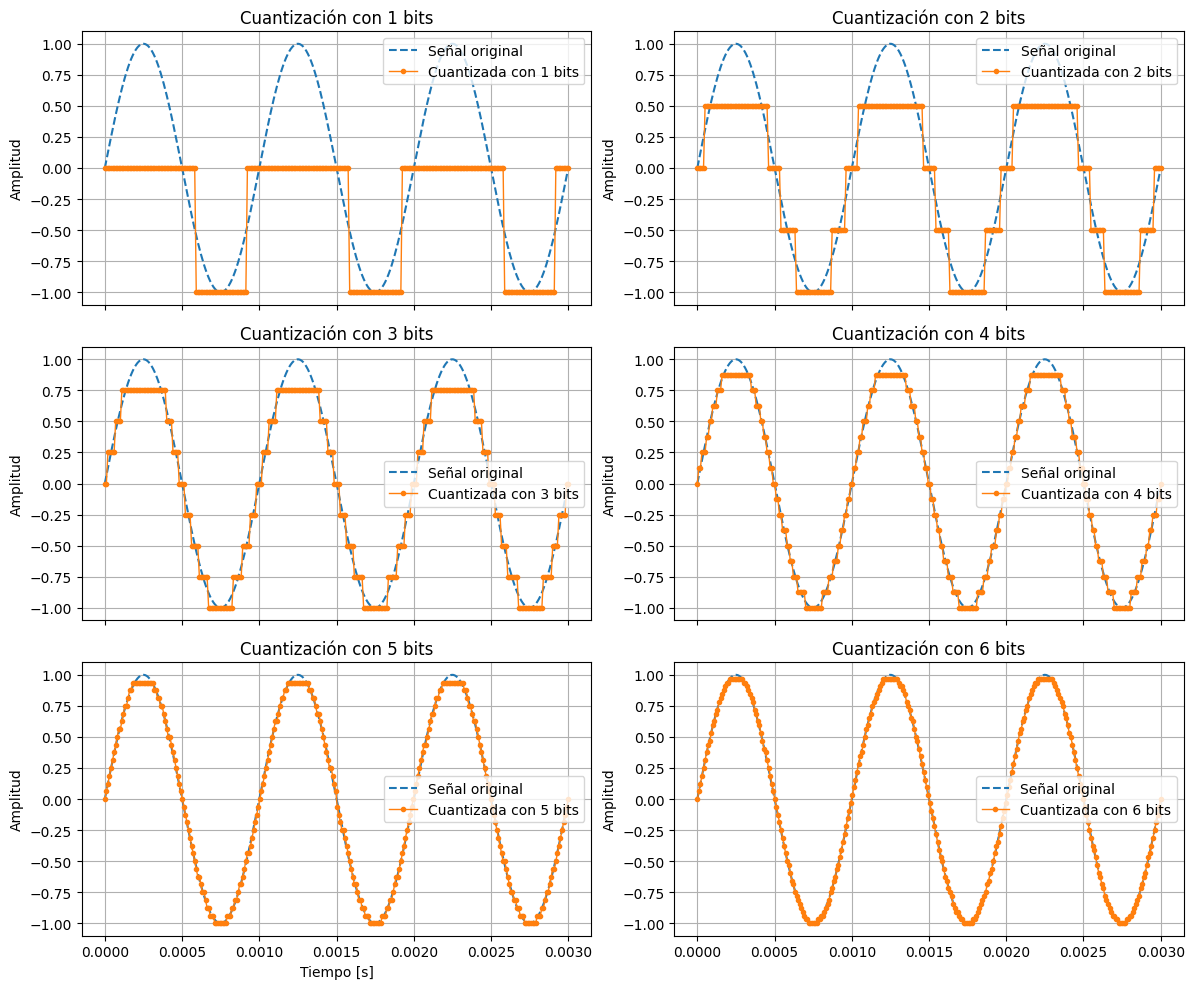

In [11]:
#Solucion Señal Senoidal
def ejercicio1_1(frecuencia, muestras_por_ciclo, ciclos):
    periodo = 1 / frecuencia  # Periodo de la señal
    t = np.linspace(0, ciclos * periodo, ciclos * muestras_por_ciclo)
    senal = np.sin(2 * np.pi * frecuencia * t)
    return senal, t

def ejercicio1_2():
    f_max = 10_000  # Hz

    # Generamos la señal original (3 períodos) con alta resolución
    muestras_por_ciclo = 1000   # Ajusta este valor para mayor o menor resolución
    ciclos = 3
    senal, t = ejercicio1_1(f_max, muestras_por_ciclo, ciclos)

    # Frecuencia de muestreo "original" (para compatibilidad con la firma de la función)
    fs_ori = f_max * muestras_por_ciclo  

    # Definimos las diferentes frecuencias de muestreo
    fs_list = [f_max/4, f_max/2, f_max, 2*f_max, 4*f_max, 8*f_max, 16*f_max, 32*f_max]

    plt.figure(figsize=(10, 8))

    for i, fs_dest in enumerate(fs_list, start=1):
        # Obtenemos la señal muestreada con sample-and-hold
        s_resample, t_samp, samples = sample_and_hold(t, senal, fs_ori, fs_dest)
        
        plt.subplot(4, 2, i)
        # Señal original
        plt.plot(t, senal, label='Señal original')
        # Señal sample-and-hold (onda escalonada)
        plt.step(t, s_resample, where='post', label='Sample and Hold')
        # Puntos de muestreo (con marcador y tamaño amplificado)
        plt.scatter(t_samp, samples, marker='x', s=80, label='Muestras')
        
        plt.title(f'Muestreo a fs = {fs_dest:.0f} Hz')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Amplitud')
        plt.legend()

    plt.tight_layout()
    plt.show()

def ejercicio1_3():
    # Parámetros de la señal
    frecuencia = 1000           # Frecuencia en Hz
    muestras_por_ciclo = 100    # Muestras por cada ciclo
    ciclos = 3                # Número de ciclos de la señal
    
    # Generar la señal original
    senal, t = ejercicio1_1(frecuencia, muestras_por_ciclo, ciclos)
    
    # Lista de bits para cuantización
    bits_list = [1, 2, 3, 4, 5, 6]
    
    # Crear subplots: 3 filas, 2 columnas
    fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)
    axes = axes.flatten()  # Aplanar para iterar fácilmente
    
    for ax, bits in zip(axes, bits_list):
        # Cuantización de la señal con el número de bits actual
        senal_cuantizada = fxquant(senal, bits)
        
        # Graficar la señal original (línea discontinua) y la cuantizada
        ax.plot(t, senal, label='Señal original', linestyle='--')
        ax.plot(t, senal_cuantizada, label=f'Cuantizada con {bits} bits', marker='o', markersize=3, linewidth=1)
        ax.set_title(f'Cuantización con {bits} bits')
        ax.set_ylabel('Amplitud')
        ax.legend()
        ax.grid(True)
    
    # Eliminar subplots vacíos si hay menos de 6 niveles de cuantización
    for i in range(len(bits_list), len(axes)):
        fig.delaxes(axes[i])
    
    axes[-2].set_xlabel('Tiempo [s]')  # Etiqueta en el penúltimo subplot
    plt.tight_layout()
    plt.show()

t, signal = ejercicio1_1(10000, 1000, 3)
plt.plot(signal, t)
plt.title('Señal Senoidal')
plt.show()

ejercicio1_2()
ejercicio1_3()


## Señal de audio

Repita los procesos de muestreo y cuantización para el archivo de audio
'sample.wav' el cual fue grabado a una frecuencia de muestreo de 8000Hz. Para el proceso de muestreo de la señal de audio use la función 'resample' de la libreria scipy.signal ya que la función sample_and_hold no es eficiente pues está pensada meramente para fines educativos/ilustrativos.

(1) Analice el comportamiento de un segmento de 40ms de la señal muestreada. Compare el resultado de este segmento para diferentes valores de Fs respecto a la señal original. Analice y concluya.

(2) Considere nuevamente la señal de audio completa ('sample.wav') y segmente un pedazo de 500ms. Usando la función 'plot_spectrogram' (provista en esta guía), analice los resultados que se obtenienen a nivel espectral al muestrear a las diferentes frecuencias Fs. Analice y concluya. Asegúrese de usar los mismos límites para los ejes en todas las figuras.

(3) Escuche cómo cambia el audio completo a medida que cambian los diferentes valores de la Fs.

(4) Considere nuevamente el segmento de 20ms y analice el efecto de variar la cantidad de bits de cuantización. Analice y concluya.

(5) Tome nuevamente el segmento de 500ms de audio y use la función 'plot_spectrogram' (provista en esta guía) para analizar el efecto que tiene cambiar la cantidad de bits de cuantización. Analice y concluya.

(6) Escuche cómo cambia el audio completo a medida que cambia la cantidad de bits de cuantización.

(7) Compare los espectrogramas antes construidos con el espectrograma calculado para todo el audio completo ('sample.wav').
